## Cars Linear Regression
#### X : 'speed' (속도)  , Y : 'dist' (제동거리)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(5)

# 학습 데이터 : X와 Y 데이터
xy = np.loadtxt('data-01-cars.csv',unpack=True,delimiter=',',skiprows=1)
x_train = xy[0]
y_train = xy[1]

In [2]:
# 변수 초기화 : weight, bias
# tf.random.normal([1]) : 난수를 1개 생성
W = tf.Variable(tf.random.normal([1]), name = 'weight')
b = tf.Variable(tf.random.normal([1]), name = 'bias')

In [3]:
# 예측 함수(hypothesis) : H(X) = W*X + b
def hypothesis(X):
    return X*W + b

In [4]:
# 비용함수 : (H(x) - y)^2의 평균
# tf.square() : 제곱
# tf.reduce_mean() : 합의 평균
def cost_func():
    cost = tf.reduce_mean(tf.square(hypothesis(x_train) - y_train))
    return cost

In [5]:
# 경사 하강법
# learning_rate(학습율)을 0.01 로 설정하여 optimizer객체를 생성
# optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.01)
# optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.01)
optimizer = tf.keras.optimizers.Adam(lr=0.01)

In [6]:
# 학습 시작
print('****** Start Learning!!')
for step in range(10001):
    # cost를 minimize 한다
    optimizer.minimize(cost_func,var_list=[W,b]) # W,b를 업데이트
    if step % 100 == 0:
        print('%04d'%step,'cost:[',cost_func().numpy(),']',
             ' W:',W.numpy(),' b:',b.numpy())
        
print('****** Learning Finished!!')        

****** Start Learning!!
0000 cost:[ 2746.3662 ]  W: [-0.17030665]  b: [0.23652864]
0100 cost:[ 1405.5791 ]  W: [0.7634749]  b: [1.1666381]
0200 cost:[ 711.9278 ]  W: [1.5014503]  b: [1.8872595]
0300 cost:[ 412.7359 ]  W: [2.0317748]  b: [2.3801653]
0400 cost:[ 307.80438 ]  W: [2.3737347]  b: [2.6606305]
0500 cost:[ 278.32724 ]  W: [2.5699966]  b: [2.7712991]
0600 cost:[ 271.50888 ]  W: [2.6710968]  b: [2.765768]
0700 cost:[ 269.90894 ]  W: [2.719547]  b: [2.6902547]
0800 cost:[ 269.20804 ]  W: [2.7431982]  b: [2.5753827]
0900 cost:[ 268.59503 ]  W: [2.7569902]  b: [2.4376867]
1000 cost:[ 267.95435 ]  W: [2.7676616]  b: [2.2846844]
1100 cost:[ 267.27454 ]  W: [2.7778053]  b: [2.1193192]
1200 cost:[ 266.55594 ]  W: [2.7882767]  b: [1.9426078]
1300 cost:[ 265.8 ]  W: [2.799316]  b: [1.7548759]
1400 cost:[ 265.00818 ]  W: [2.8109796]  b: [1.5562363]
1500 cost:[ 264.182 ]  W: [2.8232772]  b: [1.3467466]
1600 cost:[ 263.32303 ]  W: [2.836209]  b: [1.1264534]
1700 cost:[ 262.43286 ]  W: [2.84

In [7]:
# Weight과 bias 출력
print('Weight:',W.numpy())
print('bias:', b.numpy())

Weight: [3.9324002]
bias: [-17.57895]


In [10]:
# 예측
print('******* Predict')
# 속도가 30과 50일 때 제동 거리를 예측
print('speed=30, dist=',hypothesis(30).numpy())
print('speed=50, dist=',hypothesis(50).numpy())

print('speed=[10,11,12,24,25], dist=',hypothesis([10,11,12,24,25]).numpy())


******* Predict
speed=30, dist= [100.39306]
speed=50, dist= [179.04106]
speed=[10,11,12,24,25], dist= [21.74505  25.67745  29.609854 76.79866  80.73106 ]


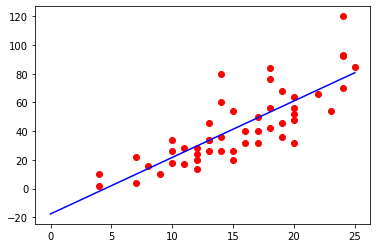

In [14]:
# 시각화 : matplotlib 사용
def prediction(X,W,b):
    return X*W + b

plt.plot(x_train,y_train,'ro')  # Red      , 원본 데이터
# plt.plot((0,25),(0,prediction(25,W,b)),'g' ) # Green
plt.plot((0,25),(prediction(0,W,b),prediction(25,W,b)),'b' ) # Blue, 예측함수